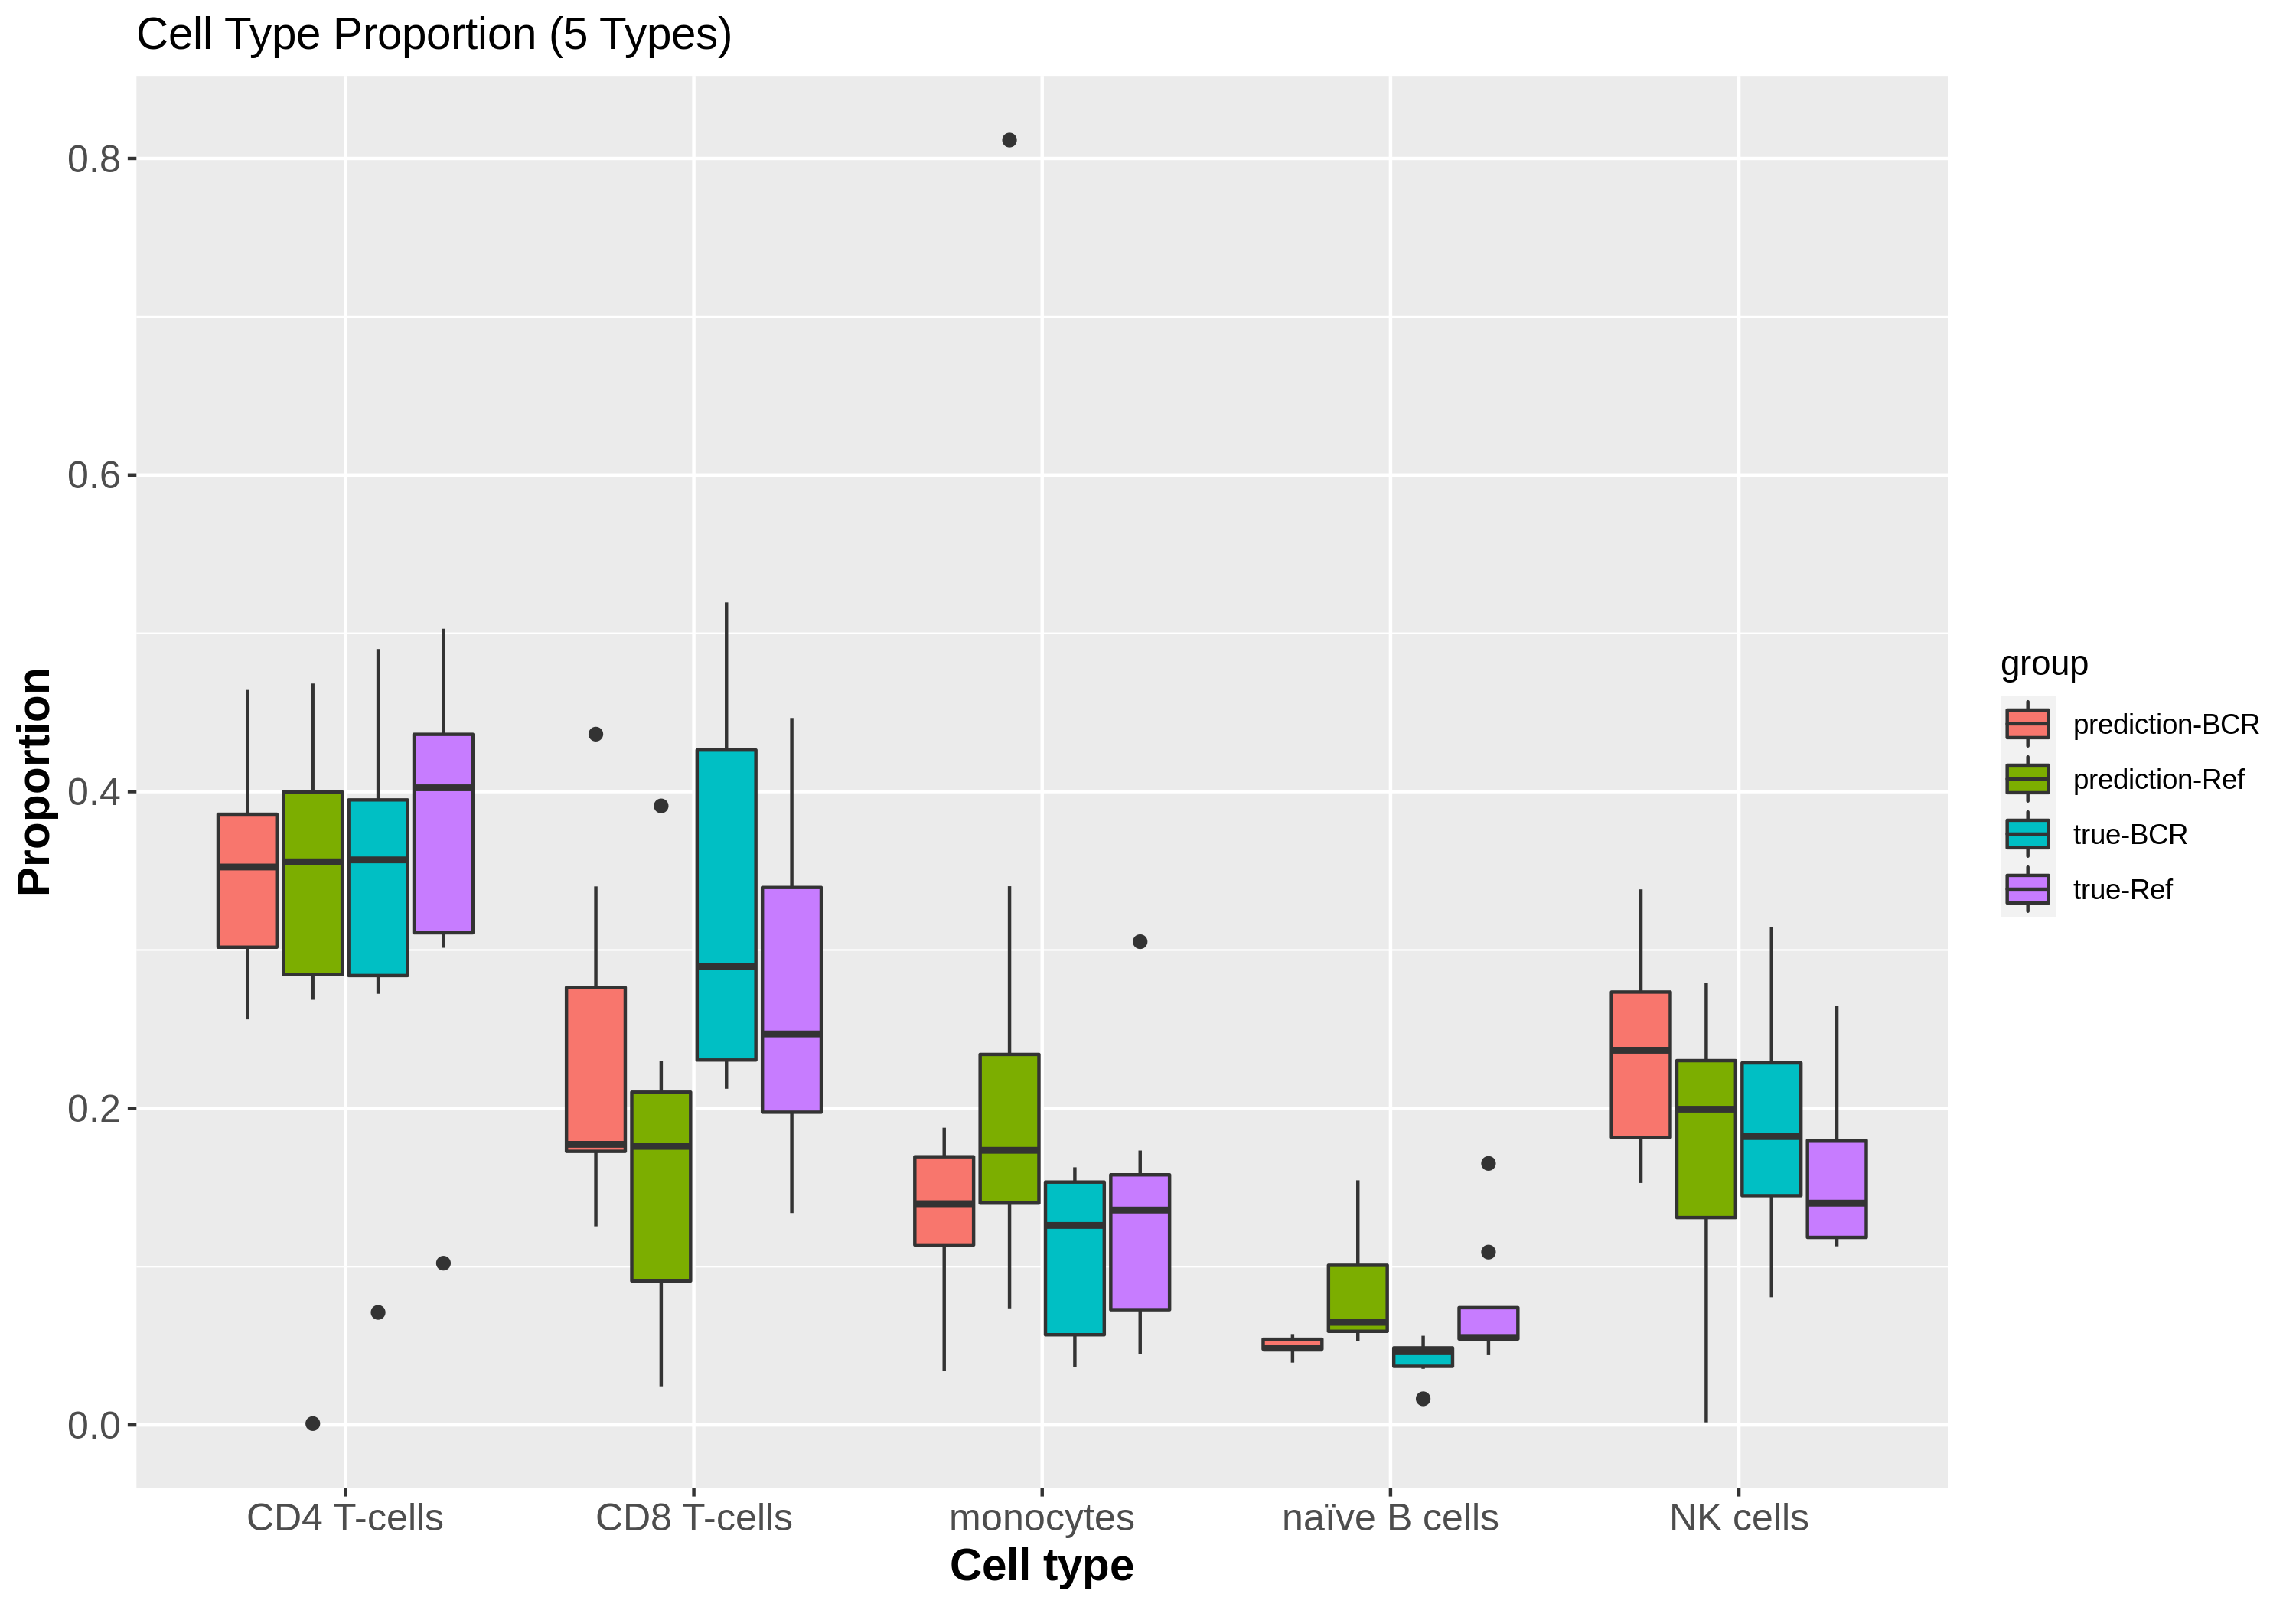

In [45]:
library(Seurat)
library(reshape2)
library(ggplot2)
library(cowplot)

## 5 cell types
seur_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype', pattern='*seur*', full=T, ignore.case = TRUE)
rst_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype', pattern='*rst*', full=T, ignore.case = TRUE)
BCR_XL_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype', pattern=glob2rx('*BCR-XL.rds'), full=T, ignore.case = TRUE)
Reference_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype', pattern=glob2rx('*Reference.rds'), full=T, ignore.case = TRUE)
rst_BCR_files <- intersect(rst_files,BCR_XL_files)
rst_Reference_files <- intersect(rst_files,Reference_files)
seur_BCR_files <- intersect(seur_files,BCR_XL_files)
seur_Reference_files <- intersect(seur_files,Reference_files)

# BCR
ct_cnt_pred <- data.frame(matrix(0,5,nrow=1,ncol=5))
ct_cnt_label <- data.frame(matrix(0,5,nrow=1,ncol=5))
colnames(ct_cnt_pred) <- colnames(ct_cnt_label) <- c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells', 
                                                     'NK cells')

for(sample.idx in 1:length(rst_BCR_files)){
    rst <- readRDS(rst_BCR_files[sample.idx])
    seur <- readRDS(seur_BCR_files[sample.idx])
    truth <- seur$label
    
    ## subsetting
    H_est_subsetting <- rst$H[,-1]
    H_est_subsetting <- apply(H_est_subsetting,2,function(x) x/sum(x))
    
    idx.subsetting = c()
    for(i in 1:length(seur$label)){
        if(max(H_est_subsetting[,i])>0.5){
            idx.subsetting = append(idx.subsetting,i)
        }

    }  
    # cell type proportions
    seur_sub <- subset(seur, cells=Cells(seur)[idx.subsetting])
    ct_cnt_pred <- rbind(ct_cnt_pred,table(seur_sub$pred)[c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells', 
                                                     'NK cells')])
    ct_cnt_label <- rbind(ct_cnt_label,table(seur_sub$label)[c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells', 
                                                     'NK cells')])                                                       
}

# Reference
ct_cnt_ref_pred <- data.frame(matrix(0,5,nrow=1,ncol=5))
ct_cnt_ref_label <- data.frame(matrix(0,5,nrow=1,ncol=5))
colnames(ct_cnt_ref_pred) <- colnames(ct_cnt_ref_label) <- c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells', 
                                                     'NK cells')

for(sample.idx in 1:length(rst_BCR_files)){
    rst <- readRDS(rst_Reference_files[sample.idx])
    seur <- readRDS(seur_Reference_files[sample.idx])
    truth <- seur$label
    
    ## subsetting
    H_est_subsetting <- rst$H[,-1]
    H_est_subsetting <- apply(H_est_subsetting,2,function(x) x/sum(x))
    
    idx.subsetting = c()
    for(i in 1:length(seur$label)){
        if(max(H_est_subsetting[,i])>0.5){
            idx.subsetting = append(idx.subsetting,i)
        }

    }  
    # cell type proportions
    if(is.null(idx.subsetting)) {
        ct_cnt_ref_pred <- rbind(ct_cnt_ref_pred, NA)
    } else{
        seur_sub <- subset(seur, cells=Cells(seur)[idx.subsetting])
    ct_cnt_ref_pred <- rbind(ct_cnt_ref_pred,table(seur_sub$pred)[c('CD4 T-cells','CD8 T-cells','monocytes', 
                                                                    'naïve B cells', 'NK cells')])
    }
    ct_cnt_ref_label <- rbind(ct_cnt_ref_label,table(seur_sub$label)[c('CD4 T-cells','CD8 T-cells','monocytes', 
                                                                       'naïve B cells', 'NK cells')])                          
}

ct_cnt_pred <- ct_cnt_pred[-1,]
ct_cnt_label <- ct_cnt_label[-1,]
ct_cnt_ref_pred <- ct_cnt_ref_pred[-1,]
ct_cnt_ref_label <- ct_cnt_ref_label[-1,]

ct_prop_pred <- apply(ct_cnt_pred,1,function(x) x/sum(x))
ct_prop_label <- apply(ct_cnt_label,1,function(x) x/sum(x))
ct_prop_ref_pred <- apply(ct_cnt_ref_pred,1,function(x) x/sum(x))
ct_prop_ref_label <- apply(ct_cnt_ref_label,1,function(x) x/sum(x))
                           
ct_prop_pred <- ct_prop_pred[,-8]
                           
ct_prop_pred <- data.frame(ct_prop_pred)
ct_prop_label <- data.frame(ct_prop_label)  
ct_prop_ref_pred <- data.frame(ct_prop_ref_pred)
ct_prop_ref_label <- data.frame(ct_prop_ref_label)  


ct_prop_pred$celltype <- rownames(ct_prop_pred)
ct_prop_label$celltype <- rownames(ct_prop_label)
ct_prop_ref_pred$celltype <- rownames(ct_prop_ref_pred)
ct_prop_ref_label$celltype <- rownames(ct_prop_ref_label)
                           
saveRDS(ct_prop_pred,"/home/bz234/project/Results/CyTOF/BCR_Cytof/type_prop/sub_prop_pred_BCR_5type.rds")
saveRDS(ct_prop_label,"/home/bz234/project/Results/CyTOF/BCR_Cytof/type_prop/sub_prop_label_BCR_5type.rds")
saveRDS(ct_prop_ref_pred,"/home/bz234/project/Results/CyTOF/BCR_Cytof/type_prop/sub_prop_pred_ref_5type.rds")
saveRDS(ct_prop_ref_label,"/home/bz234/project/Results/CyTOF/BCR_Cytof/type_prop/sub_prop_label_ref_5type.rds")
                           
ct_prop_pred_long <-  melt(ct_prop_pred, id.vars = 'celltype', variable.name = 'patient.ID')
ct_prop_label_long <-  melt(ct_prop_label, id.vars = 'celltype', variable.name = 'patient.ID')   
ct_prop_pred_ref_long <-  melt(ct_prop_ref_pred, id.vars = 'celltype', variable.name = 'patient.ID')
ct_prop_label_ref_long <-  melt(ct_prop_ref_label, id.vars = 'celltype', variable.name = 'patient.ID')
ct_prop_pred_long$group = "prediction-BCR"
ct_prop_label_long$group = "true-BCR"
ct_prop_pred_ref_long$group = "prediction-Ref"
ct_prop_label_ref_long$group = "true-Ref"
ct_prop_long <- rbind(ct_prop_pred_long,ct_prop_label_long)    
ct_prop_ref_long <- rbind(ct_prop_pred_ref_long,ct_prop_label_ref_long)    

ct_prop_long_all <- rbind(ct_prop_long,ct_prop_ref_long)
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 300)
ggplot(ct_prop_long_all, aes(x=celltype, y=value,fill=group)) + 
    geom_boxplot()+
    xlab('Cell type') +
    ylab('Proportion') +
    ggtitle('Cell Type Proportion (5 Types)') +
    theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"),
        plot.title = element_text(size=14)) 

In [31]:
ct_prop_ref_pred

,2,3,4,5,6,7,8,9
CD4 T-cells,0.468302658,0.42593654,0.36426069,0.28972521,0.39116034,0.0008398656,0.26853805,0.34711272
CD8 T-cells,0.391002045,0.16704893,0.09096006,0.09099960,0.22978988,0.0243561030,0.20363459,0.18474323
monocytes,0.073619632,0.14057722,0.15893483,0.34030267,0.13870200,0.8115901456,0.18797663,0.19859365
naïve B cells,0.065439673,0.05275229,0.11002102,0.06411788,0.05517027,0.1545352744,0.06044134,0.09780524
NK cells,0.001635992,0.21368502,0.27582341,0.21485464,0.18517752,0.0086786114,0.27940938,0.17174515


In [3]:
ct_prop_pred

,X2,X3,X4,X5,X6,X7,X8,celltype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CD4 T-cells,0.27558421,0.37848489,0.32795156,0.35242352,0.3930294,0.46423503,0.25615442,CD4 T-cells
CD8 T-cells,0.43634166,0.34016932,0.17423478,0.12543651,0.1772211,0.17130287,0.21242074,CD8 T-cells
monocytes,0.03424658,0.08918406,0.17950443,0.18773572,0.1397230,0.15923928,0.13819470,monocytes
naïve B cells,0.04794521,0.03933732,0.05740554,0.04847046,0.0533686,0.04782856,0.05492354,naïve B cells
NK cells,0.20588235,0.15282441,0.26090369,0.28593379,0.2366578,0.15739427,0.33830660,NK cells


In [5]:
ct_prop_ref_pred

,X2,X3,X4,X5,X6,X7,X8,X9,celltype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CD4 T-cells,0.468302658,0.42593654,0.36426069,0.28972521,0.39116034,0.0008398656,0.26853805,0.34711272,CD4 T-cells
CD8 T-cells,0.391002045,0.16704893,0.09096006,0.09099960,0.22978988,0.0243561030,0.20363459,0.18474323,CD8 T-cells
monocytes,0.073619632,0.14057722,0.15893483,0.34030267,0.13870200,0.8115901456,0.18797663,0.19859365,monocytes
naïve B cells,0.065439673,0.05275229,0.11002102,0.06411788,0.05517027,0.1545352744,0.06044134,0.09780524,naïve B cells
NK cells,0.001635992,0.21368502,0.27582341,0.21485464,0.18517752,0.0086786114,0.27940938,0.17174515,NK cells


In [10]:
str(t.test(ct_prop_pred[2,-8], ct_prop_ref_pred[2, -9]))

List of 10
 $ statistic  : Named num 1.05
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 12.7
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 0.311
 $ conf.int   : num [1:2] -0.0643 0.1864
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 0.234 0.173
  ..- attr(*, "names")= chr [1:2] "mean of x" "mean of y"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ stderr     : num 0.0579
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "ct_prop_pred[2, -8] and ct_prop_ref_pred[2, -9]"
 - attr(*, "class")= chr "htest"


In [27]:
ct_prop_label

,X2,X3,X4,X5,X6,X7,X8,celltype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CD4 T-cells,0.28767123,0.38702379,0.35340285,0.36038553,0.41807998,0.49006529,0.27228646,CD4 T-cells
CD8 T-cells,0.46615633,0.41300540,0.23747057,0.21232016,0.23401276,0.21984104,0.34147706,CD8 T-cells
monocytes,0.03908139,0.06291052,0.15057742,0.16273223,0.14299051,0.16193585,0.03646028,monocytes
naïve B cells,0.04512490,0.01649394,0.05628434,0.04735298,0.05196826,0.04754471,0.03543454,naïve B cells
NK cells,0.16196616,0.12056634,0.20226483,0.21720911,0.15294850,0.08061311,0.31434166,NK cells


In [46]:
t_mat_5 <- matrix(, 5, 4)
rownames(t_mat_5) <- rownames(ct_prop_pred)
colnames(t_mat_5) <- c('p (Predicted)', 'CI (Predicted)', 'p (True)', 'CI (TRUE)')
for(i in rownames(t_mat_5)) {
    t_pred <- t.test(ct_prop_pred[i,-8], ct_prop_ref_pred[i, -9])
    t_mat_5[i, 1] <- t_pred$p.value
    t_mat_5[i, 2] <- paste0('(', paste(as.character(round(t_pred$conf.int, 2)), collapse = ', '), ')')
    t_true <- t.test(ct_prop_label[i,-9], ct_prop_ref_label[i, -9])
    t_mat_5[i, 3] <- t_true$p.value
    t_mat_5[i, 4] <- paste0('(', paste(as.character(round(t_true$conf.int, 2)), collapse = ', '), ')')
}
t_mat_5

,p (Predicted),CI (Predicted),p (True),CI (TRUE)
CD4 T-cells,0.612107591375849,"(-0.1, 0.16)",0.578209143878121,"(-0.17, 0.1)"
CD8 T-cells,0.311152927542981,"(-0.06, 0.19)",0.278948330204368,"(-0.06, 0.19)"
monocytes,0.190266966913928,"(-0.32, 0.08)",0.430092504902123,"(-0.1, 0.05)"
naïve B cells,0.0365097363731258,"(-0.06, 0)",0.0640829234596087,"(-0.07, 0)"
NK cells,0.182447724914933,"(-0.04, 0.17)",0.344023168327798,"(-0.04, 0.1)"


In [47]:
## 6 cell types
seur_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/6celltype', pattern='*seur*', full=T, ignore.case = TRUE)
rst_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/6celltype', pattern='*rst*', full=T, ignore.case = TRUE)
BCR_XL_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/6celltype', pattern=glob2rx('*BCR-XL.rds'), full=T, ignore.case = TRUE)
Reference_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/6celltype', pattern=glob2rx('*Reference.rds'), full=T, ignore.case = TRUE)
rst_BCR_files <- intersect(rst_files,BCR_XL_files)
rst_Reference_files <- intersect(rst_files,Reference_files)
seur_BCR_files <- intersect(seur_files,BCR_XL_files)
seur_Reference_files <- intersect(seur_files,Reference_files)

# BCR
ct_cnt_pred <- data.frame(matrix(0,5,nrow=1,ncol=6))
ct_cnt_label <- data.frame(matrix(0,5,nrow=1,ncol=6))
colnames(ct_cnt_pred) <- colnames(ct_cnt_label) <- c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells', 
                                                     'memory B cells', 'NK cells')

for(sample.idx in 1:length(rst_BCR_files)){
    rst <- readRDS(rst_BCR_files[sample.idx])
    seur <- readRDS(seur_BCR_files[sample.idx])
    truth <- seur$label
    
    ## subsetting
    H_est_subsetting <- rst$H[,-1]
    H_est_subsetting <- apply(H_est_subsetting,2,function(x) x/sum(x))
    
    idx.subsetting = c()
    for(i in 1:length(seur$label)){
        if(max(H_est_subsetting[,i])>0.5){
            idx.subsetting = append(idx.subsetting,i)
        }

    }  
    # cell type proportions
    seur_sub <- subset(seur, cells=Cells(seur)[idx.subsetting])
    ct_cnt_pred <- rbind(ct_cnt_pred,table(seur_sub$pred)[c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells', 
                                                     'memory B cells', 'NK cells')])
    ct_cnt_label <- rbind(ct_cnt_label,table(seur_sub$label)[c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells', 
                                                     'memory B cells', 'NK cells')])                          
                              
}
                              
# Reference
ct_cnt_ref_pred <- data.frame(matrix(0,5,nrow=1,ncol=6))
ct_cnt_ref_label <- data.frame(matrix(0,5,nrow=1,ncol=6))
colnames(ct_cnt_ref_pred) <- colnames(ct_cnt_ref_label) <- c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells', 
                                                     'memory B cells', 'NK cells')

for(sample.idx in 1:length(rst_BCR_files)){
    rst <- readRDS(rst_Reference_files[sample.idx])
    seur <- readRDS(seur_Reference_files[sample.idx])
    truth <- seur$label
    
    ## subsetting
    H_est_subsetting <- rst$H[,-1]
    H_est_subsetting <- apply(H_est_subsetting,2,function(x) x/sum(x))
    
    idx.subsetting = c()
    for(i in 1:length(seur$label)){
        if(max(H_est_subsetting[,i])>0.5){
            idx.subsetting = append(idx.subsetting,i)
        }

    }  
    # cell type proportions
    if(is.null(idx.subsetting)) {
        ct_cnt_ref_pred <- rbind(ct_cnt_ref_pred, NA)
    } else{
        seur_sub <- subset(seur, cells=Cells(seur)[idx.subsetting])
    ct_cnt_ref_pred <- rbind(ct_cnt_ref_pred,table(seur_sub$pred)[c('CD4 T-cells','CD8 T-cells','monocytes', 
                                                                    'naïve B cells', 'memory B cells', 'NK cells')])
    }
    ct_cnt_ref_label <- rbind(ct_cnt_ref_label,table(seur_sub$label)[c('CD4 T-cells','CD8 T-cells','monocytes', 
                                                                       'naïve B cells', 'memory B cells', 'NK cells')])                          
}

ct_cnt_pred <- ct_cnt_pred[-1,]
ct_cnt_label <- ct_cnt_label[-1,]
ct_cnt_ref_pred <- ct_cnt_ref_pred[-1,]
ct_cnt_ref_label <- ct_cnt_ref_label[-1,]

ct_prop_pred <- apply(ct_cnt_pred,1,function(x) x/sum(x))
ct_prop_label <- apply(ct_cnt_label,1,function(x) x/sum(x))
ct_prop_ref_pred <- apply(ct_cnt_ref_pred,1,function(x) x/sum(x))
ct_prop_ref_label <- apply(ct_cnt_ref_label,1,function(x) x/sum(x))

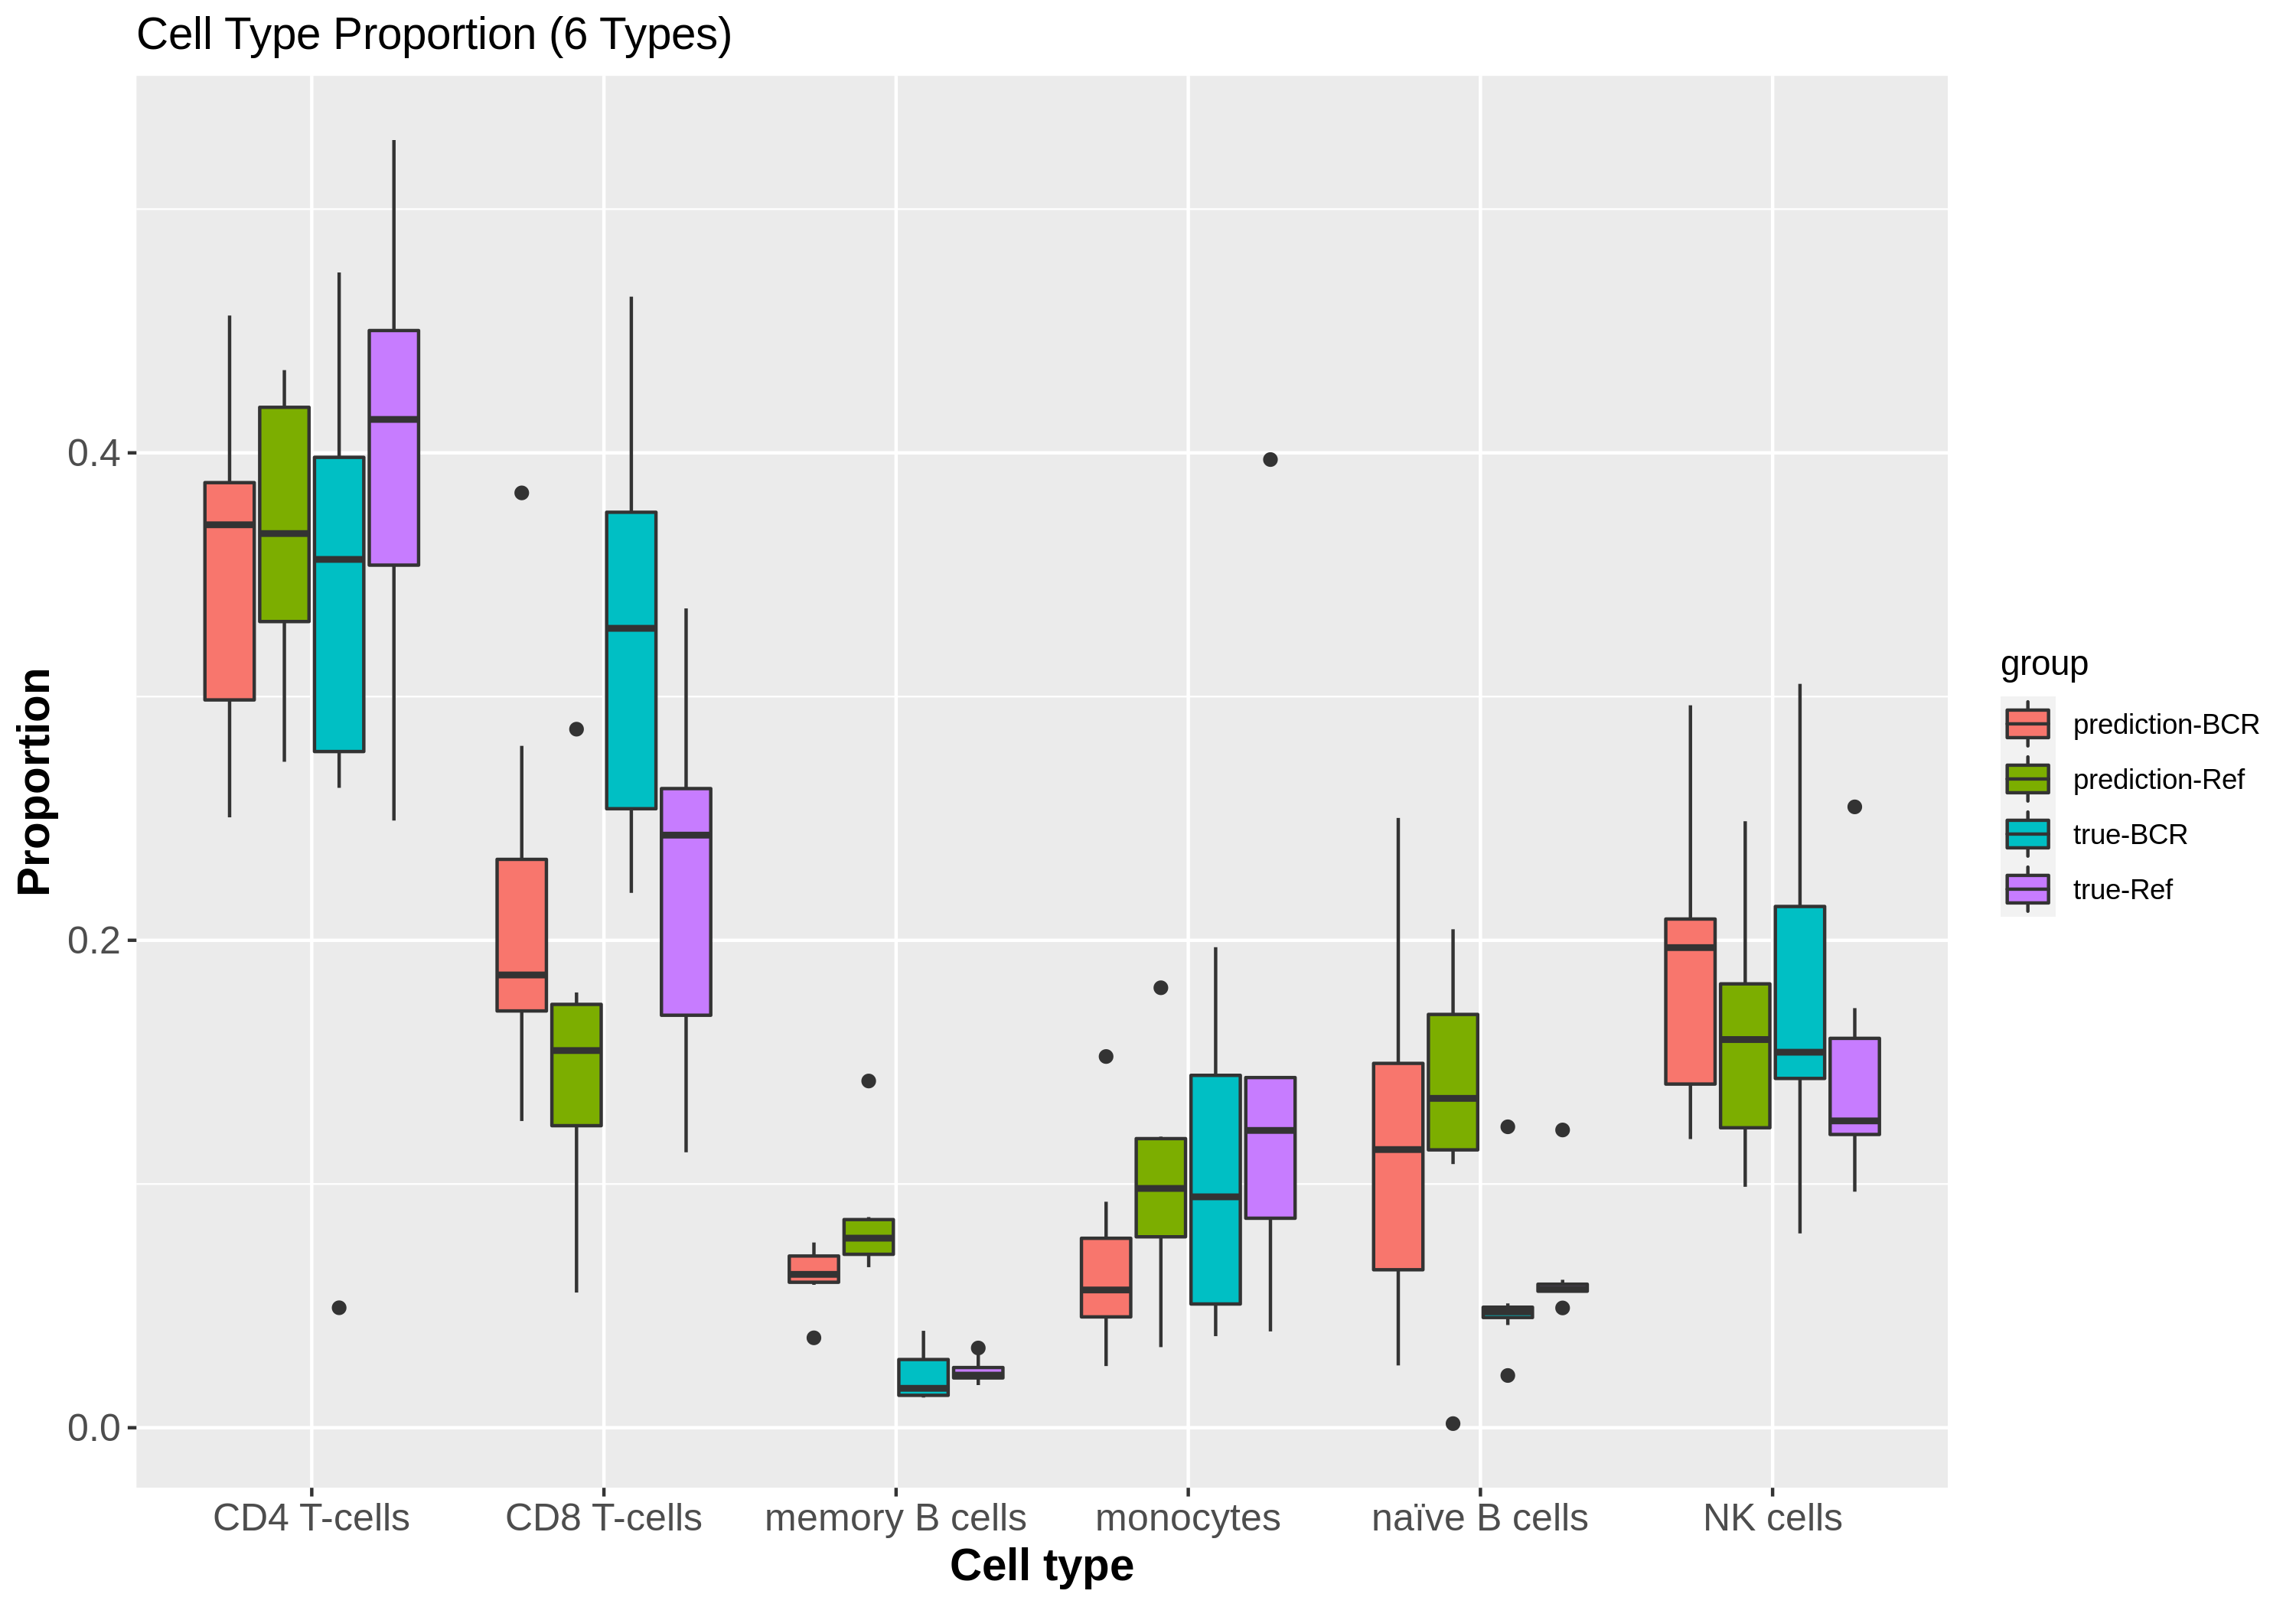

In [48]:
ct_prop_pred <- ct_prop_pred[,-3]
ct_prop_ref_pred <- ct_prop_ref_pred[,-c(4, 6)]
                           
ct_prop_pred <- data.frame(ct_prop_pred)
ct_prop_label <- data.frame(ct_prop_label)  
ct_prop_ref_pred <- data.frame(ct_prop_ref_pred)
ct_prop_ref_label <- data.frame(ct_prop_ref_label)  


ct_prop_pred$celltype <- rownames(ct_prop_pred)
ct_prop_label$celltype <- rownames(ct_prop_label)
ct_prop_ref_pred$celltype <- rownames(ct_prop_ref_pred)
ct_prop_ref_label$celltype <- rownames(ct_prop_ref_label)

saveRDS(ct_prop_pred,"/home/bz234/project/Results/CyTOF/BCR_Cytof/type_prop/sub_prop_pred_BCR_6type.rds")
saveRDS(ct_prop_label,"/home/bz234/project/Results/CyTOF/BCR_Cytof/type_prop/sub_prop_label_BCR_6type.rds")
saveRDS(ct_prop_ref_pred,"/home/bz234/project/Results/CyTOF/BCR_Cytof/type_prop/sub_prop_pred_ref_6type.rds")
saveRDS(ct_prop_ref_label,"/home/bz234/project/Results/CyTOF/BCR_Cytof/type_prop/sub_prop_label_ref_6type.rds")

ct_prop_pred_long <-  melt(ct_prop_pred, id.vars = 'celltype', variable.name = 'patient.ID')
ct_prop_label_long <-  melt(ct_prop_label, id.vars = 'celltype', variable.name = 'patient.ID')   
ct_prop_pred_ref_long <-  melt(ct_prop_ref_pred, id.vars = 'celltype', variable.name = 'patient.ID')
ct_prop_label_ref_long <-  melt(ct_prop_ref_label, id.vars = 'celltype', variable.name = 'patient.ID')
ct_prop_pred_long$group = "prediction-BCR"
ct_prop_label_long$group = "true-BCR"
ct_prop_pred_ref_long$group = "prediction-Ref"
ct_prop_label_ref_long$group = "true-Ref"
ct_prop_long <- rbind(ct_prop_pred_long,ct_prop_label_long)    
ct_prop_ref_long <- rbind(ct_prop_pred_ref_long,ct_prop_label_ref_long)    

ct_prop_long_all <- rbind(ct_prop_long,ct_prop_ref_long)
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 300)
ggplot(ct_prop_long_all, aes(x=celltype, y=value,fill=group)) + 
    geom_boxplot()+
    xlab('Cell type') +
    ylab('Proportion') +
    ggtitle('Cell Type Proportion (6 Types)') +
    theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"),
        plot.title = element_text(size=14)) 

In [42]:
ct_prop_ref_pred

,X2,X3,X4,X6,X8,X9,celltype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CD4 T-cells,0.433938371,0.42661058,0.32808230,0.39489904,0.27323918,0.33886730,CD4 T-cells
CD8 T-cells,0.286618827,0.15043170,0.05545732,0.11509033,0.17858420,0.15907218,CD8 T-cells
monocytes,0.080202617,0.11943768,0.18051760,0.11615303,0.03307115,0.07771106,monocytes
naïve B cells,0.001688476,0.13880894,0.10818196,0.13145590,0.17983554,0.20452137,naïve B cells
memory B cells,0.082313212,0.06586230,0.14226009,0.07045696,0.08643189,0.07323678,memory B cells
NK cells,0.115238497,0.09884879,0.18550072,0.17194474,0.24883804,0.14659131,NK cells


In [49]:
t_mat_6 <- matrix(, 6, 4)
rownames(t_mat_6) <- rownames(ct_prop_pred)
colnames(t_mat_6) <- c('p (Predicted)', 'CI (Predicted)', 'p (True)', 'CI (TRUE)')
for(i in rownames(t_mat_6)) {
    t_pred <- t.test(ct_prop_pred[i,-8], ct_prop_ref_pred[i, -7])
    t_mat_6[i, 1] <- t_pred$p.value
    t_mat_6[i, 2] <- paste0('(', paste(as.character(round(t_pred$conf.int, 2)), collapse = ', '), ')')
    t_true <- t.test(ct_prop_label[i,-9], ct_prop_ref_label[i, -9])
    t_mat_6[i, 3] <- t_true$p.value
    t_mat_6[i, 4] <- paste0('(', paste(as.character(round(t_true$conf.int, 2)), collapse = ', '), ')')
}
t_mat_6

,p (Predicted),CI (Predicted),p (True),CI (TRUE)
CD4 T-cells,0.678422298241709,"(-0.1, 0.07)",0.196039947470338,"(-0.2, 0.05)"
CD8 T-cells,0.23544985978132,"(-0.04, 0.16)",0.0336054663457973,"(0.01, 0.19)"
monocytes,0.239046588744296,"(-0.09, 0.03)",0.391472577300216,"(-0.14, 0.06)"
naïve B cells,0.802209652608496,"(-0.1, 0.08)",0.429034459241396,"(-0.04, 0.02)"
memory B cells,0.0928077420671607,"(-0.05, 0.01)",0.607694398978209,"(-0.01, 0.01)"
NK cells,0.428118413328744,"(-0.04, 0.1)",0.330998406506945,"(-0.04, 0.1)"


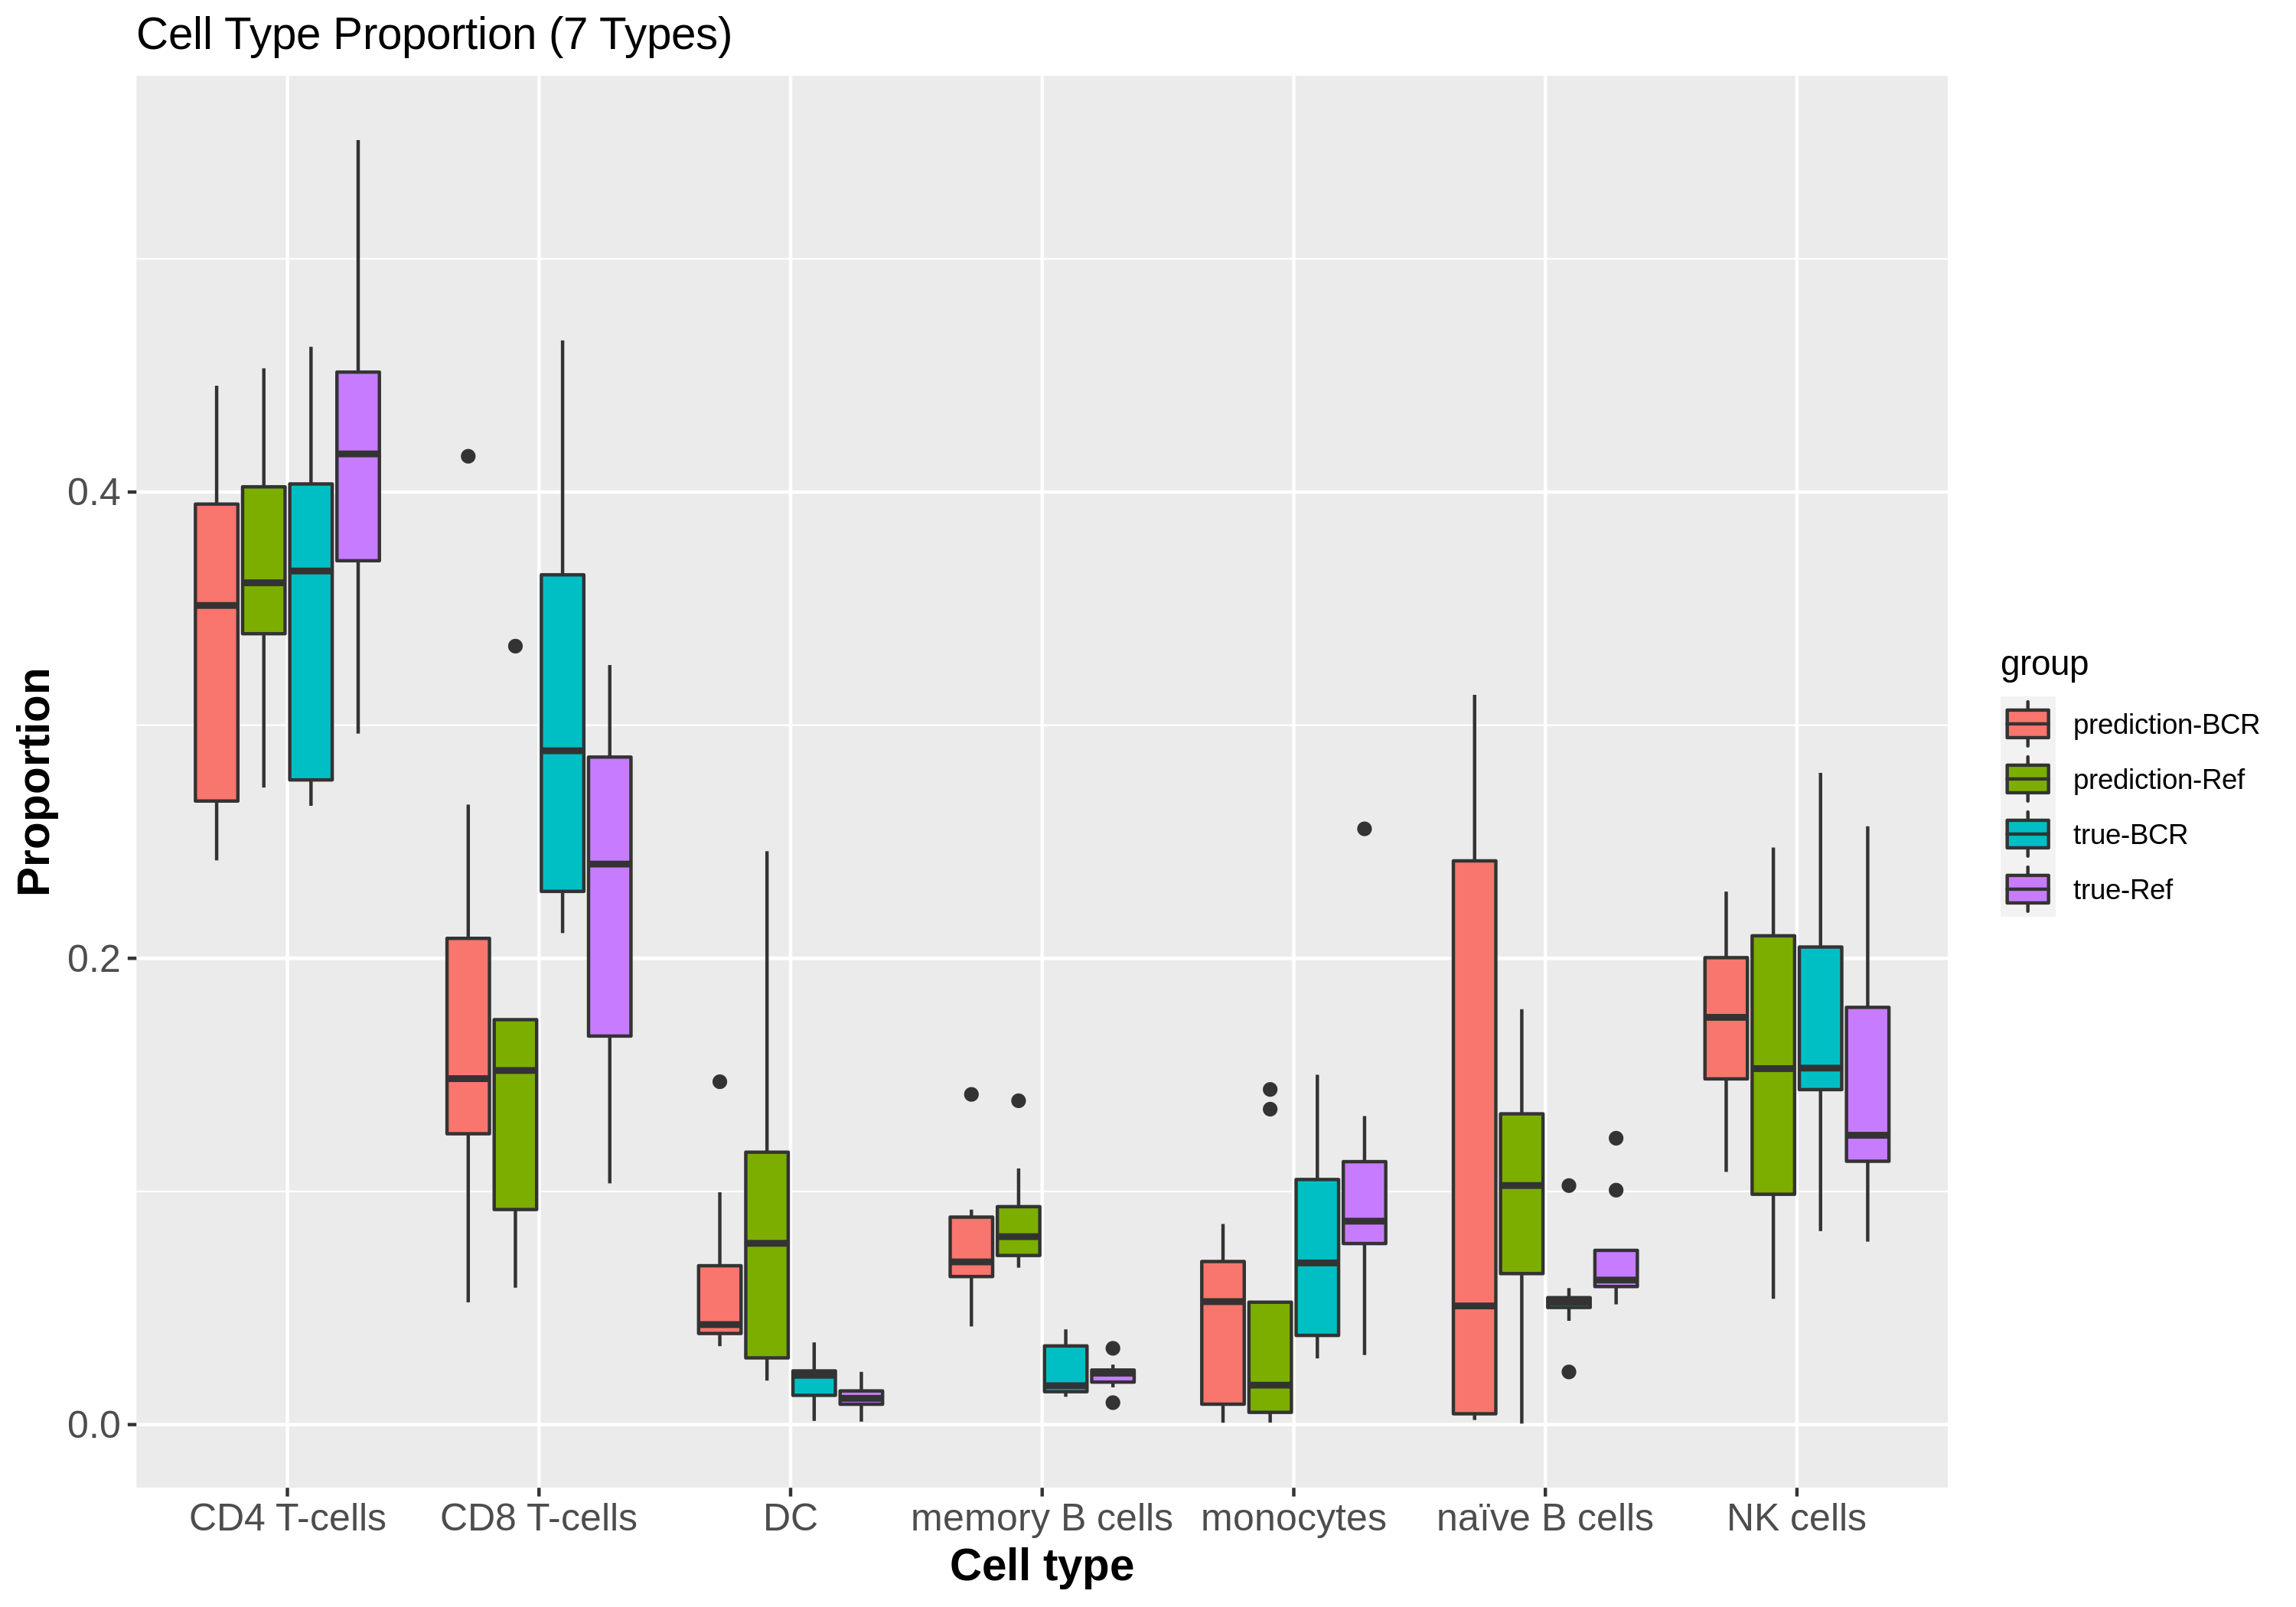

In [50]:
## 7 cell types
seur_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/7celltype', pattern='*seur*', full=T, ignore.case = TRUE)
rst_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/7celltype', pattern='*rst*', full=T, ignore.case = TRUE)
BCR_XL_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/7celltype', pattern=glob2rx('*BCR-XL.rds'), full=T, ignore.case = TRUE)
Reference_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/7celltype', pattern=glob2rx('*Reference.rds'), full=T, ignore.case = TRUE)
rst_BCR_files <- intersect(rst_files,BCR_XL_files)
rst_Reference_files <- intersect(rst_files,Reference_files)
seur_BCR_files <- intersect(seur_files,BCR_XL_files)
seur_Reference_files <- intersect(seur_files,Reference_files)

# BCR
ct_cnt_pred7 <- data.frame(matrix(0,5,nrow=1,ncol=7))
ct_cnt_label7 <- data.frame(matrix(0,5,nrow=1,ncol=7))
colnames(ct_cnt_pred7) <- colnames(ct_cnt_label7) <- c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells', 
                                                     'memory B cells', 'NK cells', 'DC')

for(sample.idx in 1:length(rst_BCR_files)){
    rst <- readRDS(rst_BCR_files[sample.idx])
    seur <- readRDS(seur_BCR_files[sample.idx])
    truth <- seur$label
    
    ## subsetting
    H_est_subsetting <- rst$H[,-1]
    H_est_subsetting <- apply(H_est_subsetting,2,function(x) x/sum(x))
    
    idx.subsetting = c()
    for(i in 1:length(seur$label)){
        if(max(H_est_subsetting[,i])>0.5){
            idx.subsetting = append(idx.subsetting,i)
        }

    }  
    # cell type proportions
    seur_sub <- subset(seur, cells=Cells(seur)[idx.subsetting])
    ct_cnt_pred7 <- rbind(ct_cnt_pred7,table(seur_sub$pred)[c('CD4 T-cells','CD8 T-cells','monocytes', 
                                                              'naïve B cells', 'memory B cells', 'NK cells', 'DC')])
    ct_cnt_label7 <- rbind(ct_cnt_label7,table(seur_sub$label)[c('CD4 T-cells','CD8 T-cells','monocytes', 
                                                                 'naïve B cells', 'memory B cells', 'NK cells', 'DC')])                          
                              
}
                              
# Reference
ct_cnt_ref_pred7 <- data.frame(matrix(0,5,nrow=1,ncol=7))
ct_cnt_ref_label7 <- data.frame(matrix(0,5,nrow=1,ncol=7))
colnames(ct_cnt_ref_pred7) <- colnames(ct_cnt_ref_label7) <- c('CD4 T-cells','CD8 T-cells','monocytes', 
                                                               'naïve B cells', 'memory B cells', 'NK cells', 'DC')

for(sample.idx in 1:length(rst_BCR_files)){
    rst <- readRDS(rst_Reference_files[sample.idx])
    seur <- readRDS(seur_Reference_files[sample.idx])
    truth <- seur$label
    
    ## subsetting
    H_est_subsetting <- rst$H[,-1]
    H_est_subsetting <- apply(H_est_subsetting,2,function(x) x/sum(x))
    
    idx.subsetting = c()
    for(i in 1:length(seur$label)){
        if(max(H_est_subsetting[,i])>0.5){
            idx.subsetting = append(idx.subsetting,i)
        }

    }  
    # cell type proportions
    if(is.null(idx.subsetting)) {
        ct_cnt_ref_pred7 <- rbind(ct_cnt_ref_pred, NA)
    } else{
        seur_sub <- subset(seur, cells=Cells(seur)[idx.subsetting])
    ct_cnt_ref_pred7 <- rbind(ct_cnt_ref_pred7,table(seur_sub$pred)[c('CD4 T-cells','CD8 T-cells','monocytes', 
                                                                    'naïve B cells', 'memory B cells', 'NK cells', 
                                                                      'DC')])
    }
    ct_cnt_ref_label7 <- rbind(ct_cnt_ref_label7,table(seur_sub$label)[c('CD4 T-cells','CD8 T-cells','monocytes', 
                                                                       'naïve B cells', 'memory B cells', 'NK cells', 
                                                                         'DC')])                          
}

ct_cnt_pred7 <- ct_cnt_pred7[-1,]
ct_cnt_label7 <- ct_cnt_label7[-1,]
ct_cnt_ref_pred7 <- ct_cnt_ref_pred7[-1,]
ct_cnt_ref_label7 <- ct_cnt_ref_label7[-1,]

ct_prop_pred7 <- apply(ct_cnt_pred7,1,function(x) x/sum(x))
ct_prop_label7 <- apply(ct_cnt_label7,1,function(x) x/sum(x))
ct_prop_ref_pred7 <- apply(ct_cnt_ref_pred7,1,function(x) x/sum(x))
ct_prop_ref_label7 <- apply(ct_cnt_ref_label7,1,function(x) x/sum(x))

ct_prop_pred7 <- data.frame(ct_prop_pred7)
ct_prop_label7 <- data.frame(ct_prop_label7)  
ct_prop_ref_pred7 <- data.frame(ct_prop_ref_pred7)
ct_prop_ref_label7 <- data.frame(ct_prop_ref_label7)  

ct_prop_pred7$celltype <- rownames(ct_prop_pred7)
ct_prop_label7$celltype <- rownames(ct_prop_label7)
ct_prop_ref_pred7$celltype <- rownames(ct_prop_ref_pred7)
ct_prop_ref_label7$celltype <- rownames(ct_prop_ref_label7)

saveRDS(ct_prop_pred7,"/home/bz234/project/Results/CyTOF/BCR_Cytof/type_prop/sub_prop_pred_BCR_7type.rds")
saveRDS(ct_prop_label7,"/home/bz234/project/Results/CyTOF/BCR_Cytof/type_prop/sub_prop_label_BCR_7type.rds")
saveRDS(ct_prop_ref_pred7,"/home/bz234/project/Results/CyTOF/BCR_Cytof/type_prop/sub_prop_pred_ref_7type.rds")
saveRDS(ct_prop_ref_label7,"/home/bz234/project/Results/CyTOF/BCR_Cytof/type_prop/sub_prop_label_ref_7type.rds")

ct_prop_pred_long7 <-  melt(ct_prop_pred7, id.vars = 'celltype', variable.name = 'patient.ID')
ct_prop_label_long7 <-  melt(ct_prop_label7, id.vars = 'celltype', variable.name = 'patient.ID')   
ct_prop_pred_ref_long7 <-  melt(ct_prop_ref_pred7, id.vars = 'celltype', variable.name = 'patient.ID')
ct_prop_label_ref_long7 <-  melt(ct_prop_ref_label7, id.vars = 'celltype', variable.name = 'patient.ID')
ct_prop_pred_long7$group = "prediction-BCR"
ct_prop_label_long7$group = "true-BCR"
ct_prop_pred_ref_long7$group = "prediction-Ref"
ct_prop_label_ref_long7$group = "true-Ref"
ct_prop_long7 <- rbind(ct_prop_pred_long7,ct_prop_label_long7)    
ct_prop_ref_long7 <- rbind(ct_prop_pred_ref_long7,ct_prop_label_ref_long7)  

ct_prop_long_all7 <- rbind(ct_prop_long7,ct_prop_ref_long7)
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 300)
ggplot(ct_prop_long_all7, aes(x=celltype, y=value,fill=group)) + 
    geom_boxplot()+
    xlab('Cell type') +
    ylab('Proportion') +
    ggtitle('Cell Type Proportion (7 Types)') +
    theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"),
        plot.title = element_text(size=14)) 

In [53]:
ct_prop_pred7
ct_prop_ref_pred7

,X2,X3,X4,X5,X6,X7,X8,X9,celltype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CD4 T-cells,0.2714626391,0.410121818,0.24199441,0.38972856,0.377323130,0.445599118,0.255489865,0.325364668,CD4 T-cells
CD8 T-cells,0.4153418124,0.265920570,0.05243929,0.12152992,0.189442449,0.138560857,0.158220721,0.125810373,CD8 T-cells
monocytes,0.0007949126,0.076458354,0.05652267,0.08605799,0.067780728,0.048968666,0.009712838,0.005875203,monocytes
naïve B cells,0.0151033386,0.001980786,0.30754352,0.08667489,0.002030298,0.005510943,0.219876126,0.313006483,naïve B cells
memory B cells,0.0584260731,0.042091710,0.14162906,0.06693399,0.072622208,0.065186585,0.092201577,0.087925446,memory B cells
NK cells,0.1987281399,0.145785877,0.15817752,0.20496607,0.191160394,0.149110376,0.228603604,0.108387358,NK cells
DC,0.0401430843,0.057640883,0.04169353,0.04410857,0.099640793,0.147063455,0.035895270,0.033630470,DC


,X2,X3,X4,X5,X6,X7,X8,X9,celltype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CD4 T-cells,0.4447723440,0.45305109,0.34437520,0.32490692,0.37775446,0.388064850,0.27325960,0.343996788,CD4 T-cells
CD8 T-cells,0.3338954469,0.15290918,0.05870777,0.06505977,0.10131748,0.173680580,0.17371503,0.150849953,CD8 T-cells
monocytes,0.0008431703,0.01336329,0.13529026,0.02488732,0.14375656,0.005346671,0.02044800,0.004952483,monocytes
naïve B cells,0.0004215852,0.11873226,0.09445720,0.03096218,0.11064475,0.176957572,0.17817641,0.076027306,naïve B cells
memory B cells,0.0801011804,0.06728950,0.13889800,0.06839114,0.07391862,0.109865471,0.08801933,0.081113639,memory B cells
NK cells,0.0539629005,0.10619678,0.19957363,0.23985891,0.16427655,0.076578130,0.24751371,0.141078838,NK cells
DC,0.0860033727,0.08845790,0.02869793,0.24593376,0.02833158,0.069506726,0.01886792,0.201980993,DC


In [55]:
t_mat_7 <- matrix(, 7, 4)
rownames(t_mat_7) <- rownames(ct_prop_pred7)
colnames(t_mat_7) <- c('p (Predicted)', 'CI (Predicted)', 'p (True)', 'CI (TRUE)')
for(i in rownames(t_mat_7)) {
    t_pred <- t.test(ct_prop_pred7[i,-9], ct_prop_ref_pred7[i, -9])
    t_mat_7[i, 1] <- t_pred$p.value
    t_mat_7[i, 2] <- paste0('(', paste(as.character(round(t_pred$conf.int, 2)), collapse = ', '), ')')
    t_true <- t.test(ct_prop_label7[i,-9], ct_prop_ref_label7[i, -9])
    t_mat_7[i, 3] <- t_true$p.value
    t_mat_7[i, 4] <- paste0('(', paste(as.character(round(t_true$conf.int, 2)), collapse = ', '), ')')
}
t_mat_7

,p (Predicted),CI (Predicted),p (True),CI (TRUE)
CD4 T-cells,0.415137423392301,"(-0.1, 0.05)",0.124394955934336,"(-0.15, 0.02)"
CD8 T-cells,0.5319826995476,"(-0.08, 0.14)",0.0842657554888798,"(-0.01, 0.17)"
monocytes,0.986828023484814,"(-0.05, 0.05)",0.284598419442708,"(-0.09, 0.03)"
naïve B cells,0.710051290460258,"(-0.1, 0.14)",0.155598809189834,"(-0.04, 0.01)"
memory B cells,0.475123504626021,"(-0.04, 0.02)",0.711272350947744,"(-0.01, 0.01)"
NK cells,0.517803722695848,"(-0.04, 0.08)",0.405459521026726,"(-0.04, 0.09)"
DC,0.333960597786412,"(-0.11, 0.04)",0.126538341411755,"(0, 0.02)"
